In [2]:
import pandas as pd
import numpy as np

file_name = 'daegu_joongu.txt'
file_path = 'C:/Users/i/Desktop/'
card_df = pd.read_csv(file_path+file_name,sep=' ')
card_df.drop('GU_CD',axis=1,inplace=True)
card_df.columns = ['날짜','업종코드','수량']
card_df.head()

,날짜,업종코드,수량
0,2019-02-01,10,411
1,2019-02-01,20,925
2,2019-02-01,21,1908
3,2019-02-01,22,2128
4,2019-02-01,30,20


In [3]:
card_piv = card_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
card_piv.head()

업종코드,10,20,21,22,30,31,32,33,34,35,...,44,50,52,60,62,70,71,80,81,92
날짜,,,,,,,,,,,,,,,,,,,,,
2019-02-01,411,925,1908,2128,20,5,99,1858,199,72,...,1990,1725,145,31,1807,18909,3618,48212,6823,91
2019-02-02,621,1937,2878,3686,10,5,131,1995,313,46,...,3716,2734,215,35,2096,13410,5253,64406,8354,167
2019-02-03,580,1453,2905,3399,5,0,82,1418,211,52,...,2788,2202,67,0,1545,2370,3842,55278,7277,68
2019-02-04,471,1298,2770,3203,0,0,97,1256,37,26,...,2745,2020,126,0,1361,2929,3209,44477,5909,41
2019-02-05,363,738,1560,2726,0,0,0,845,5,15,...,894,625,0,0,629,968,1119,22789,1682,15


In [4]:
card_19 = card_piv.iloc[:120].copy()
card_20 = card_piv.iloc[120:].copy()
card_19_week = card_19.iloc[3::7].copy()
card_20_week = card_20.iloc[3::7].copy()

for i in range(len(card_19_week)):
    for j in range(len(card_19_week.columns)):
        key = card_19_week.columns[j]
        card_19_week[key].iloc[i]=card_19[key].iloc[i*7+3:i*7+10].copy().mean()
        card_20_week[key].iloc[i]=card_20[key].iloc[i*7+3:i*7+10].copy().mean()

c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
card_19_week.index = map(lambda x : x[5:],card_19_week.index)
# card_20_week.index = map(lambda x : x[5:],card_20_week.index)
card_20_week.index = card_19_week.index

In [6]:
card_20_week.head()

업종코드,10,20,21,22,30,31,32,33,34,35,...,44,50,52,60,62,70,71,80,81,92
02-04,347.285714,801.857143,2278.857143,1225.285714,5.714286,2.142857,51.571429,1349.428571,251.571429,36.857143,...,1532.571429,1473.571429,159.857143,25.428571,1359.000000,14800.428571,2358.000000,38661.714286,4406.000000,100.714286
02-11,377.428571,1041.285714,2543.571429,1578.714286,12.857143,2.857143,55.857143,1486.285714,255.714286,32.714286,...,1797.857143,1668.571429,194.428571,30.142857,1481.857143,14476.428571,2560.428571,42938.285714,4665.000000,96.000000
02-18,161.428571,226.714286,1037.857143,473.285714,3.571429,5.857143,21.285714,1229.142857,115.857143,25.285714,...,410.428571,616.142857,105.857143,24.571429,717.142857,11872.000000,974.857143,16118.000000,3467.857143,71.000000
02-25,109.714286,117.142857,739.714286,213.571429,3.571429,2.857143,5.000000,997.857143,42.571429,17.857143,...,137.285714,384.714286,110.428571,25.000000,367.571429,7519.285714,502.714286,7878.571429,2687.857143,52.571429
03-04,114.714286,185.142857,736.857143,230.714286,6.428571,7.142857,15.142857,984.142857,75.857143,19.142857,...,233.285714,453.571429,123.428571,29.142857,507.714286,8371.428571,758.857143,10095.000000,2838.857143,60.714286


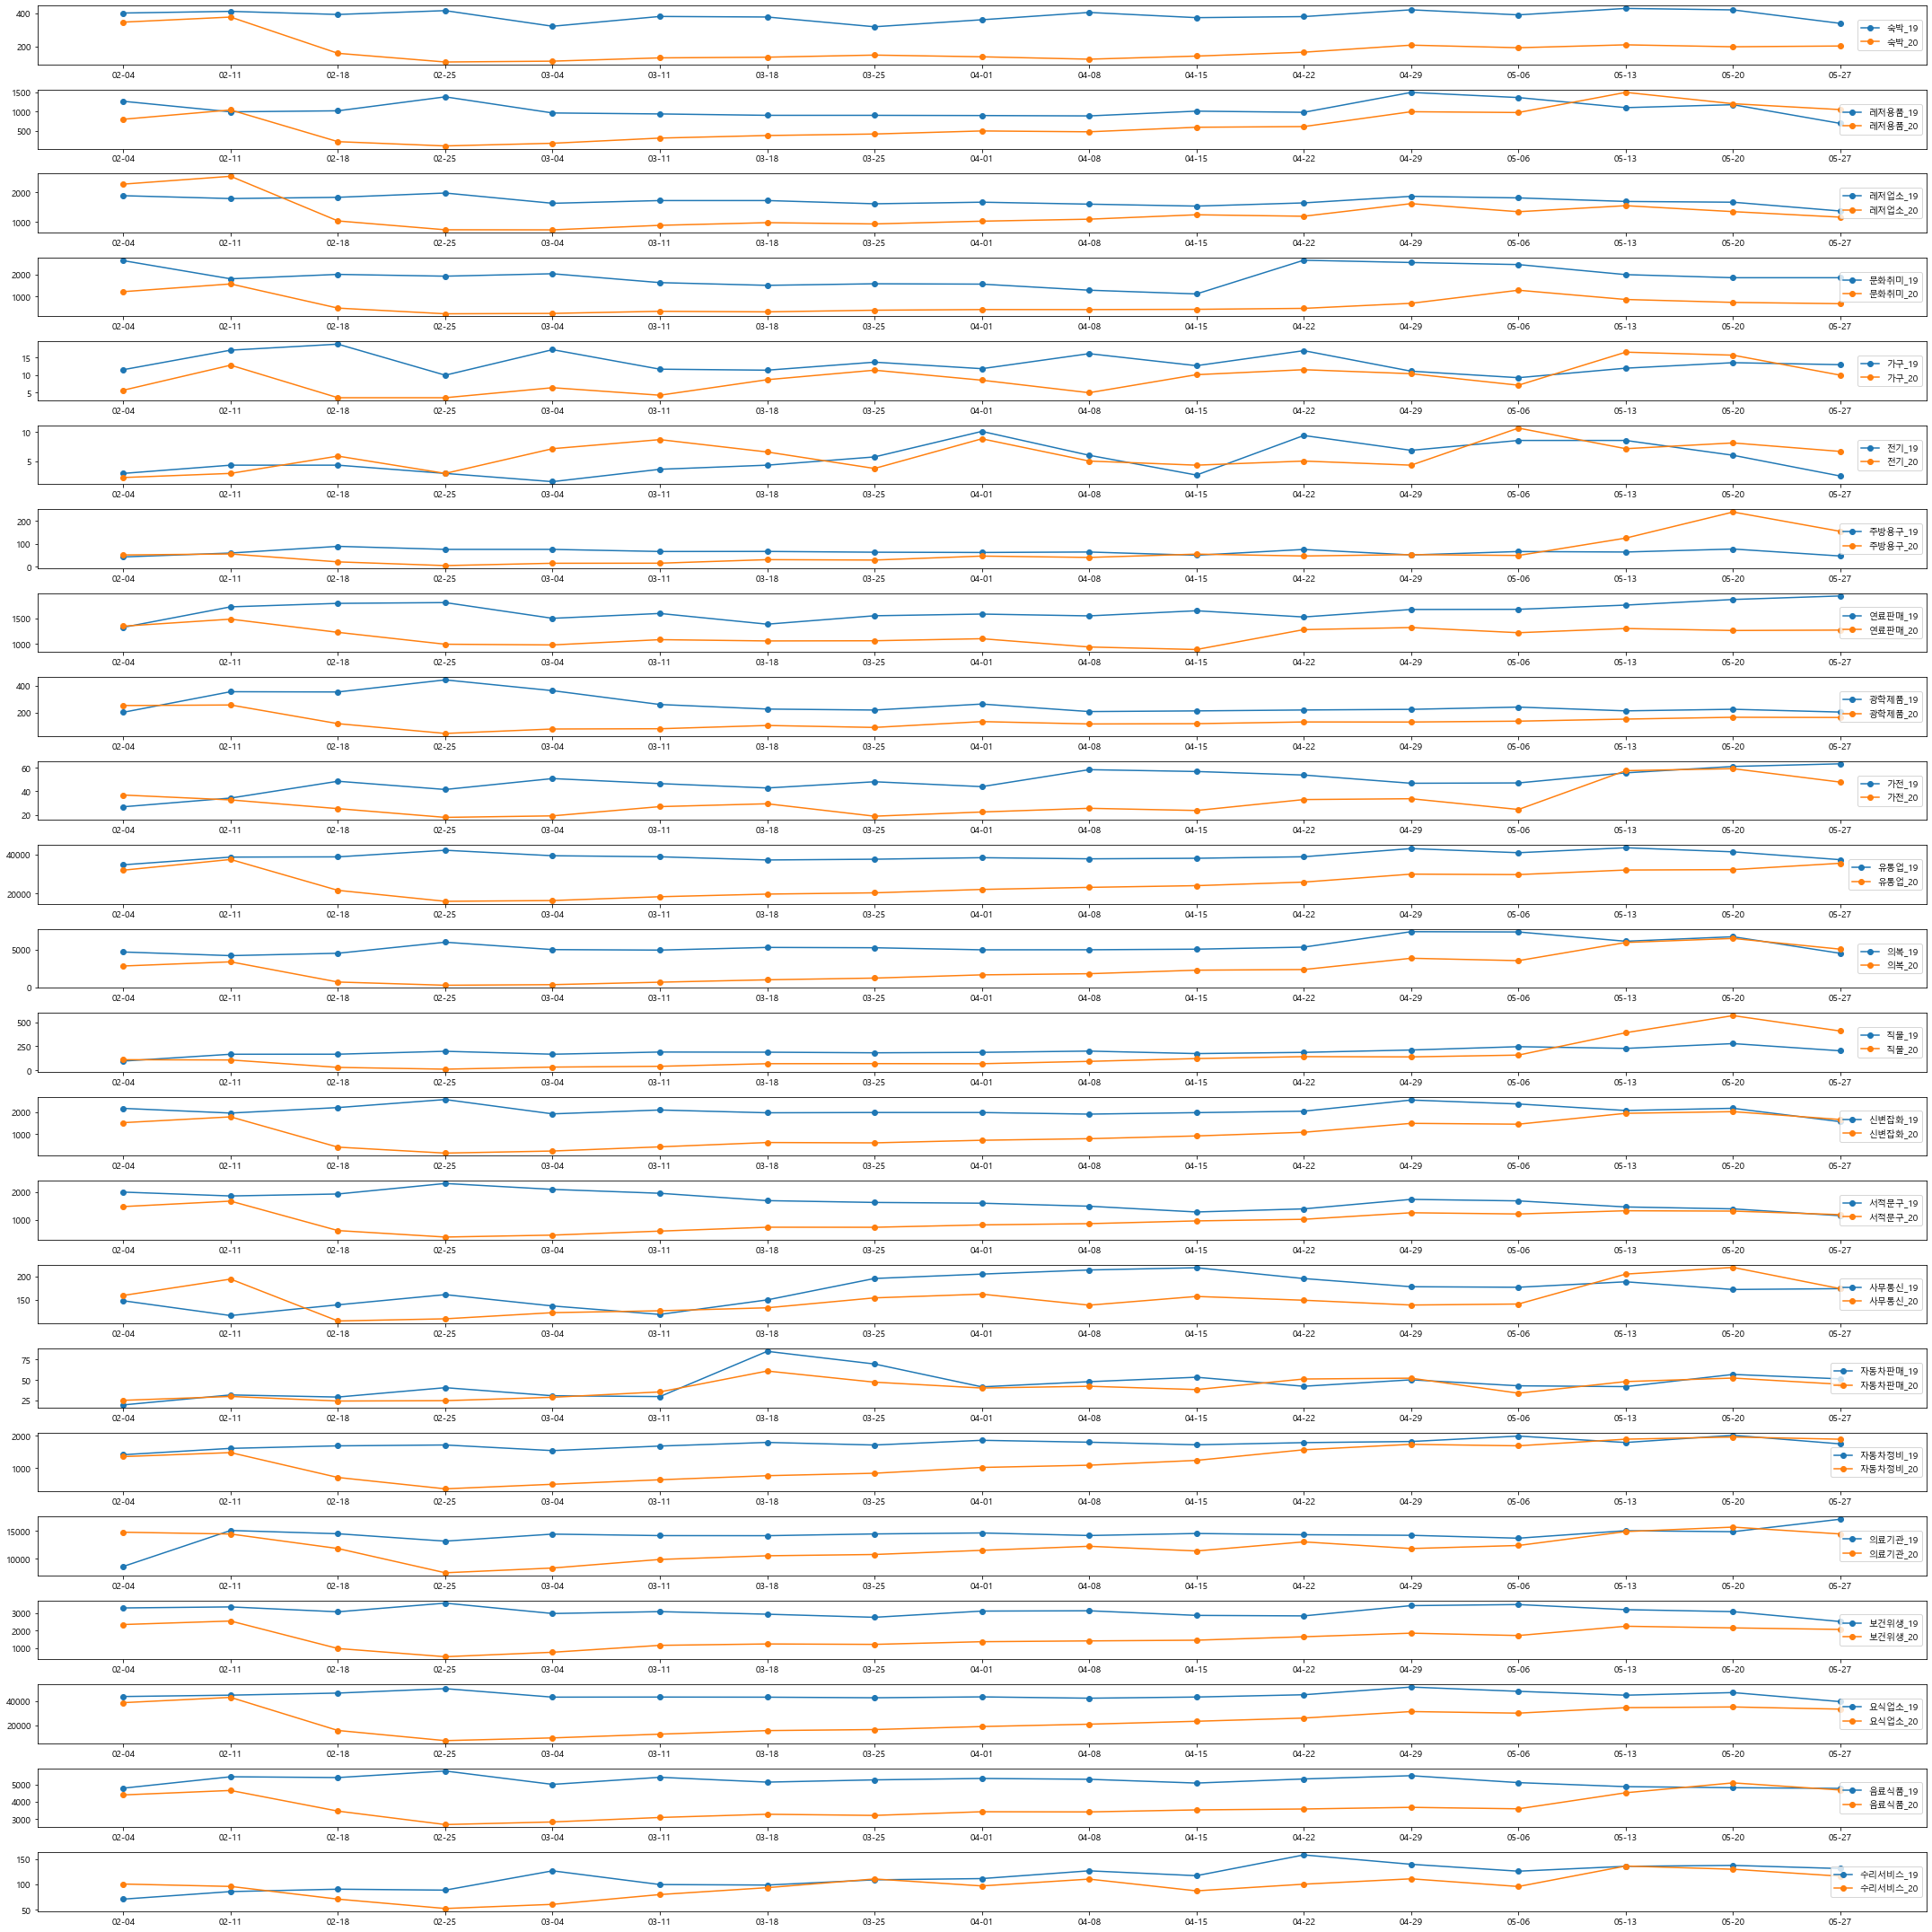

In [43]:
import matplotlib
import matplotlib.pyplot as plt 

Fg1 = plt.figure(figsize=(30,30))
plt.rc('font', family='Malgun Gothic')

names = ['숙박','레저용품','레저업소',
        '문화취미','가구','전기',
        '주방용구','연료판매','광학제품',
        '가전','유통업','의복','직물',
        '신변잡화','서적문구','사무통신',
        '자동차판매','자동차정비','의료기관',
        '보건위생','요식업소','음료식품','수리서비스']

for col in range(len(card_19_week.columns)):
    plt.subplot(len(card_19_week.columns),1,col+1)
    plt.plot(card_19_week[card_19_week.columns[col]],marker='o')
    plt.plot(card_20_week[card_20_week.columns[col]],marker='o')
    plt.legend([names[col]+'_19',names[col]+'_20'],loc='right')
plt.tight_layout()

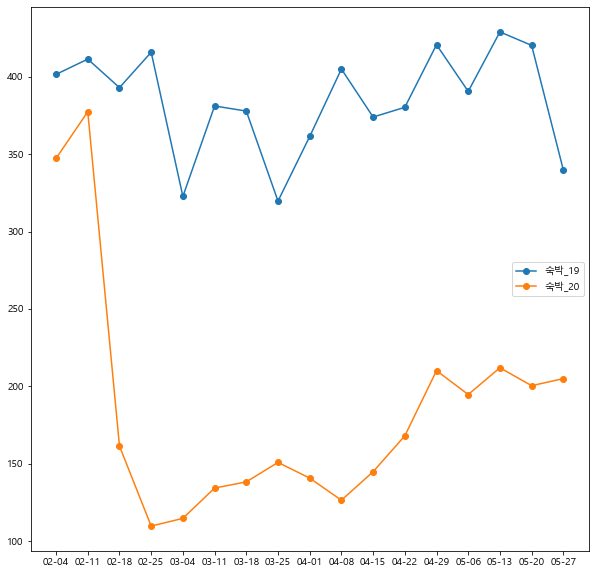

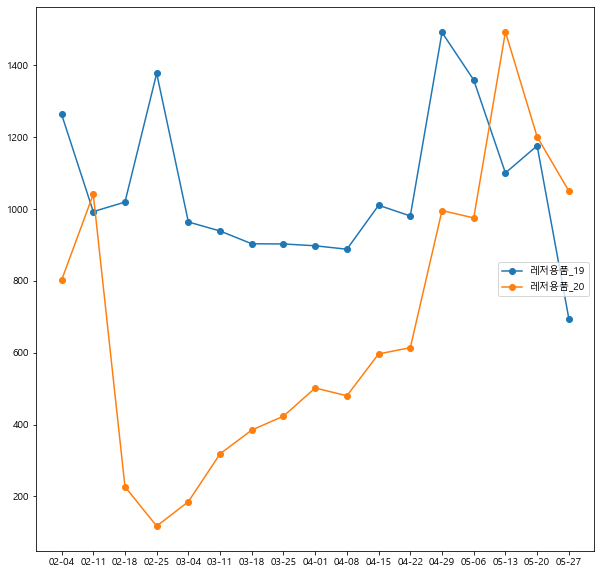

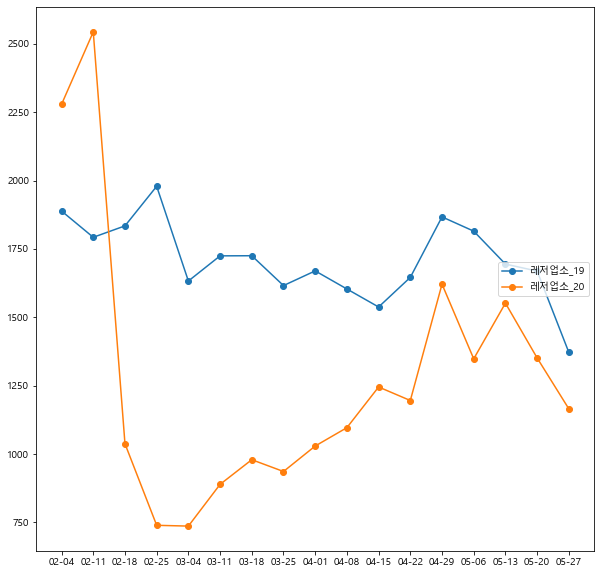

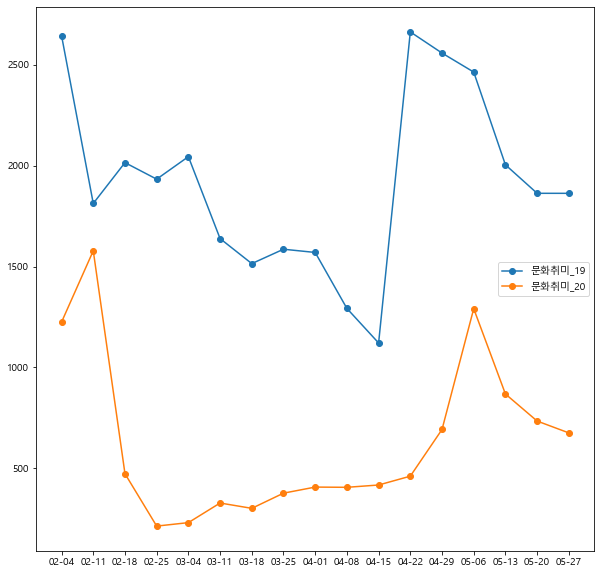

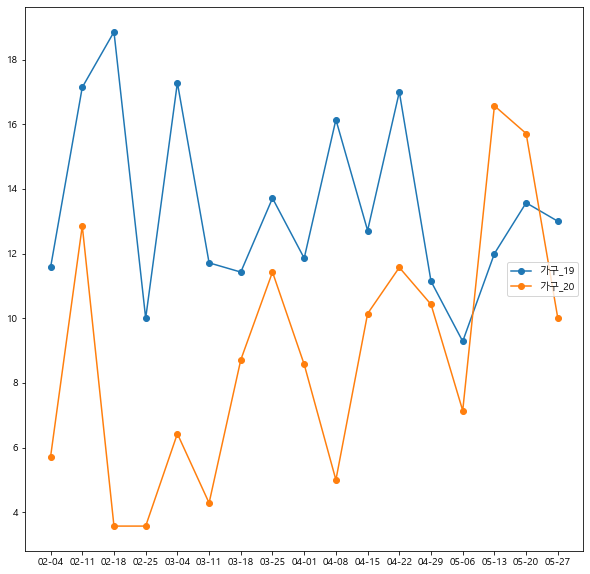

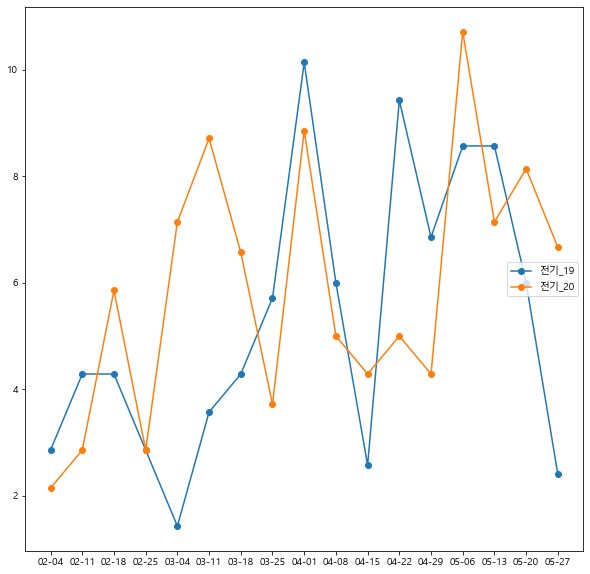

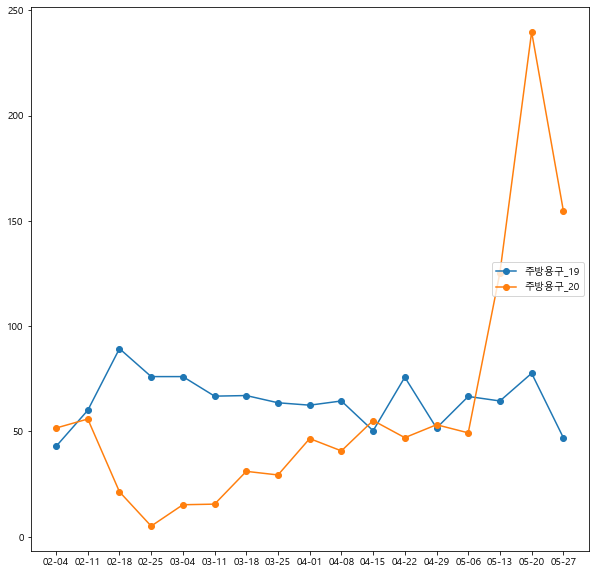

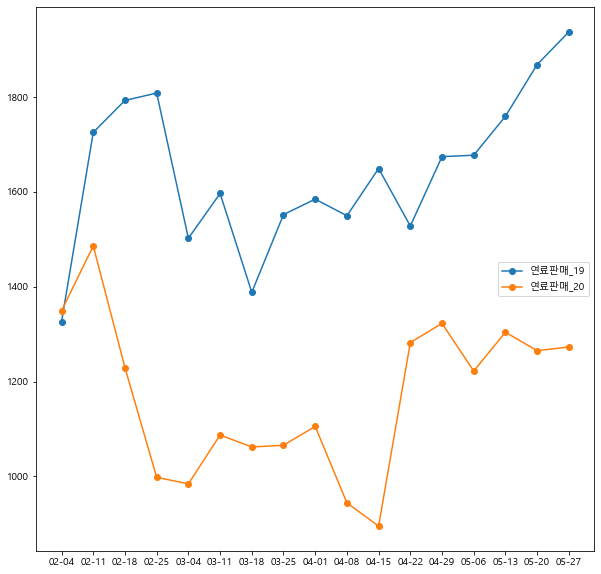

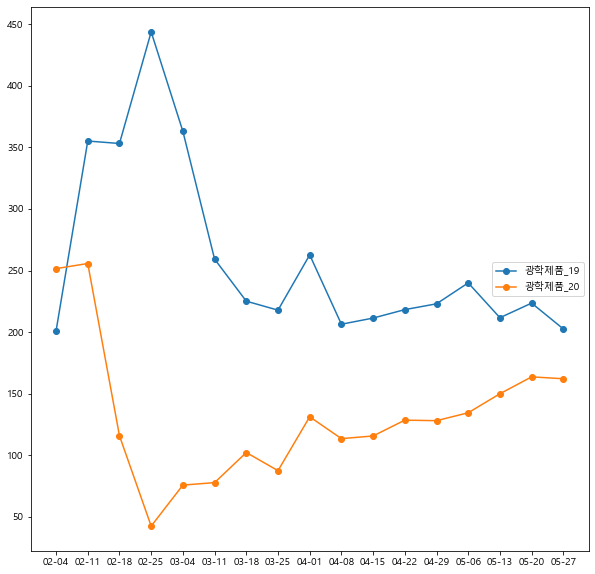

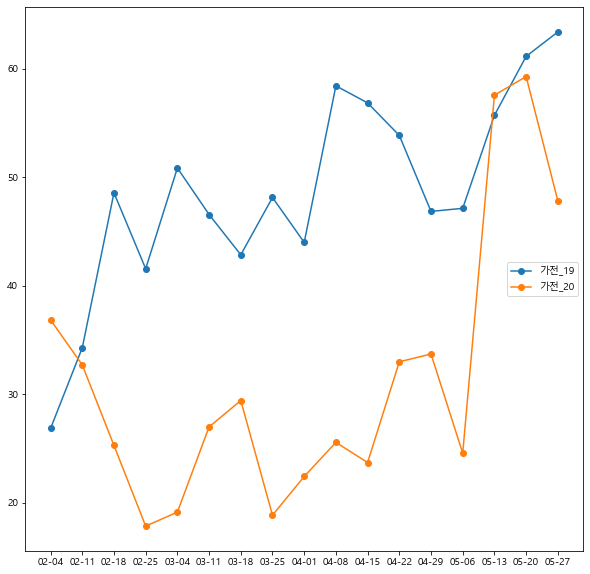

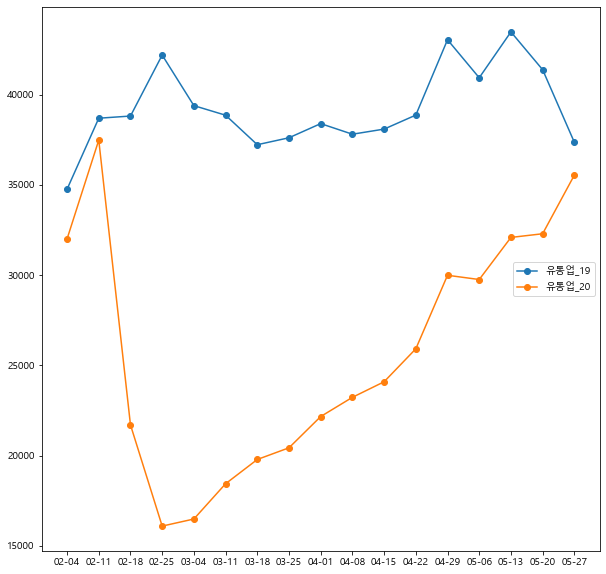

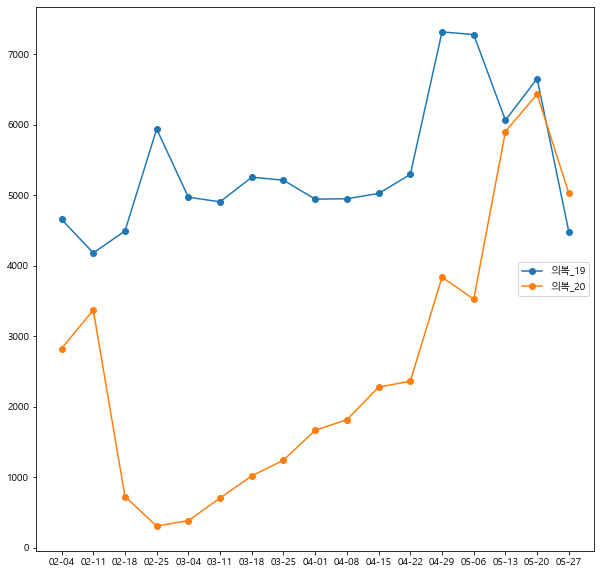

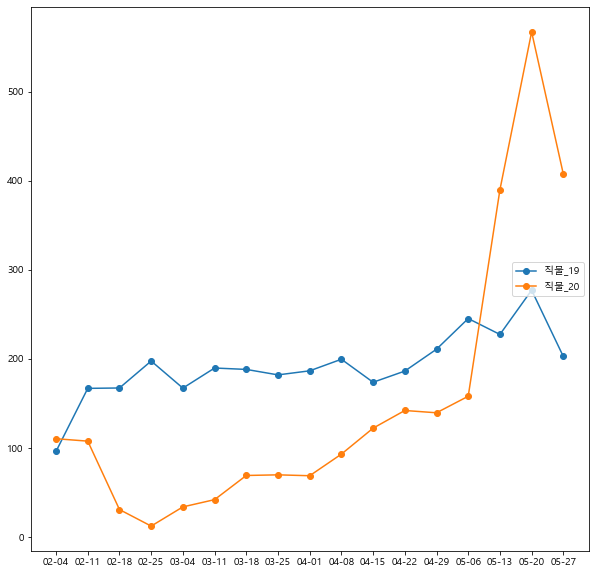

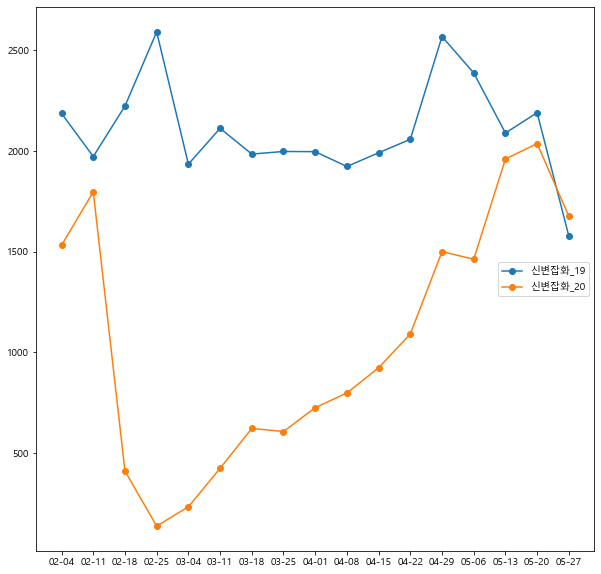

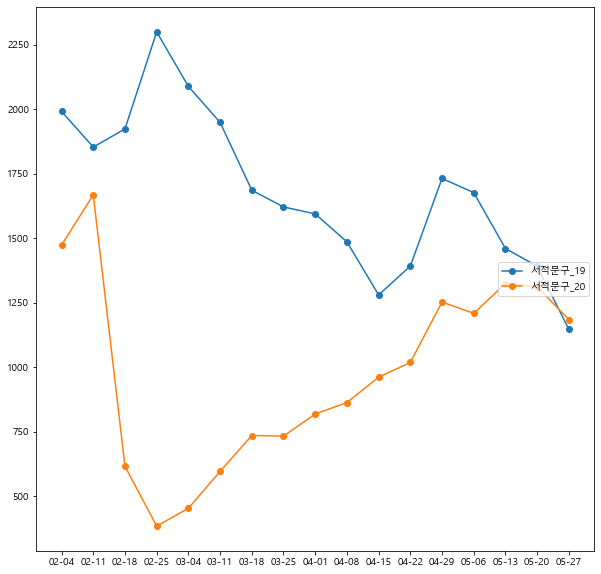

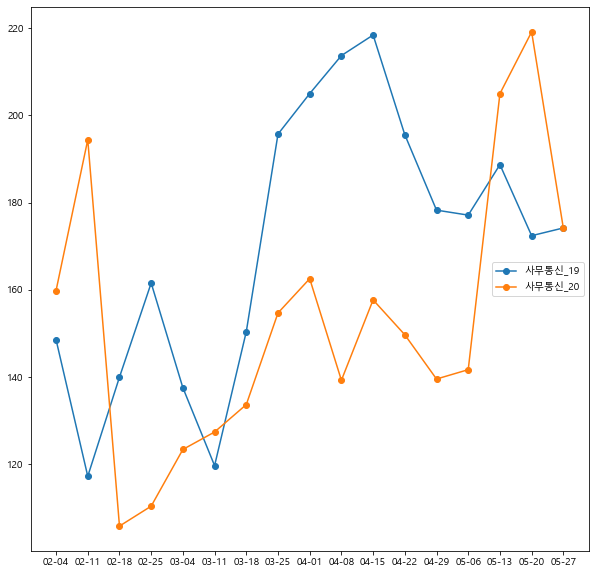

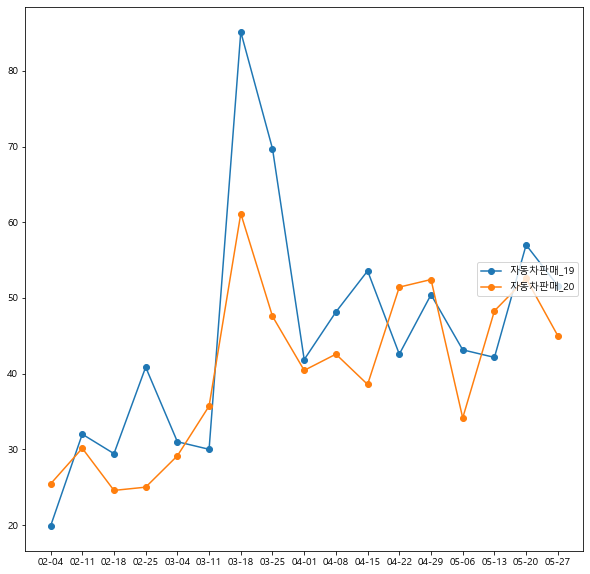

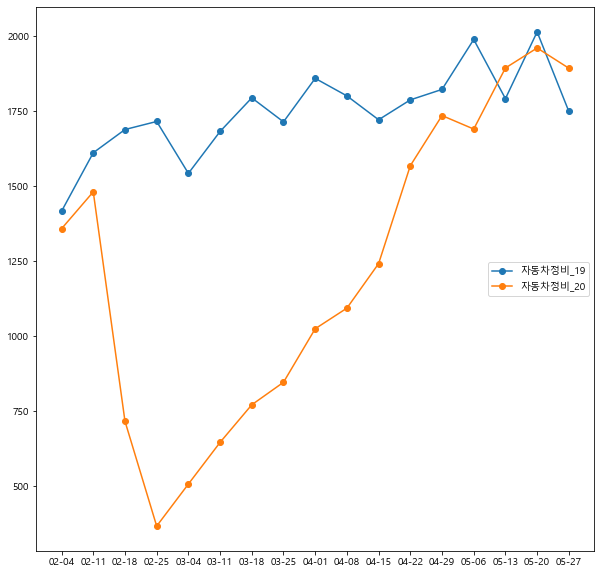

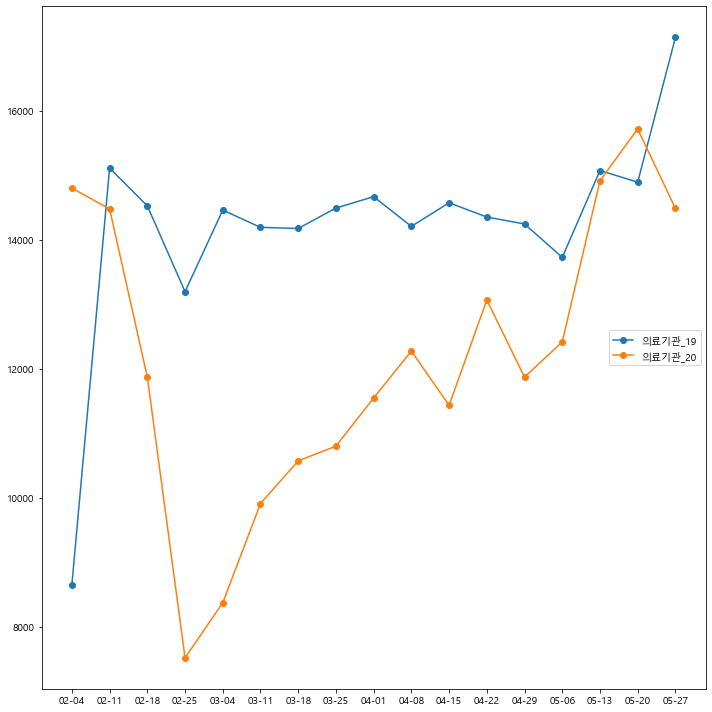

In [9]:
import matplotlib
import matplotlib.pyplot as plt 

plt.rc('font', family='Malgun Gothic')

names = ['숙박','레저용품','레저업소',
        '문화취미','가구','전기',
        '주방용구','연료판매','광학제품',
        '가전','유통업','의복','직물',
        '신변잡화','서적문구','사무통신',
        '자동차판매','자동차정비','의료기관',
        '보건위생','요식업소','음료식품','수리서비스']

for col in range(len(card_19_week.columns)-4):
    plt.figure(figsize=(10,10))
    #plt.subplot(len(card_19_week.columns),1,col+1)
    plt.plot(card_19_week[card_19_week.columns[col]],marker='o')
    plt.plot(card_20_week[card_20_week.columns[col]],marker='o')
    plt.legend([names[col]+'_19',names[col]+'_20'],loc='right')
plt.tight_layout()

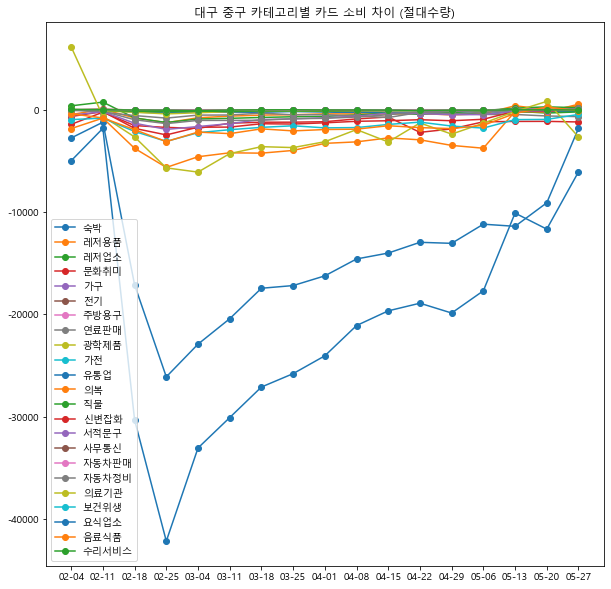

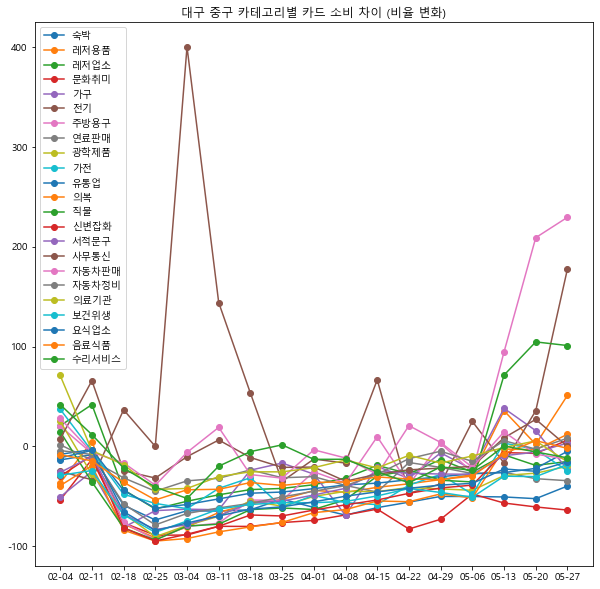

In [34]:
card_diff = card_20_week-card_19_week
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.plot(card_diff,marker='o')
plt.title('대구 중구 카테고리별 카드 소비 차이 (절대수량)')
plt.legend(names)
plt.savefig('test1.png',dpi=300,edgecolor='black')
card_diff = (card_diff/card_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.plot(card_diff,marker='o')
plt.title('대구 중구 카테고리별 카드 소비 차이 (비율 변화)')
plt.legend(names)
plt.savefig('test2.png',dpi=300,edgecolor='black')

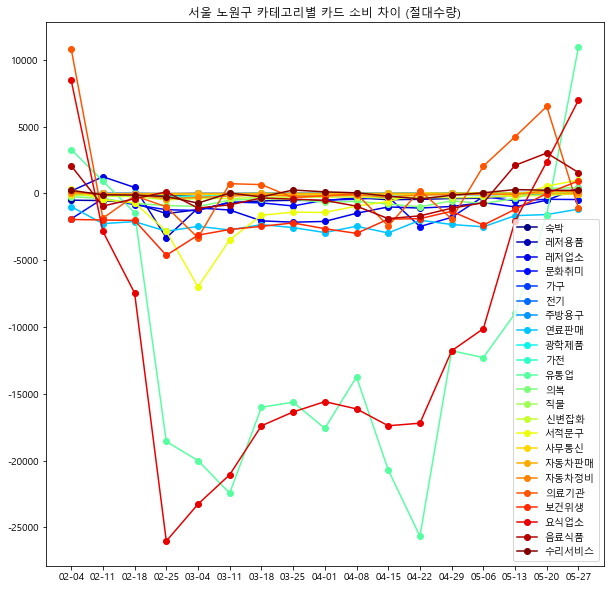

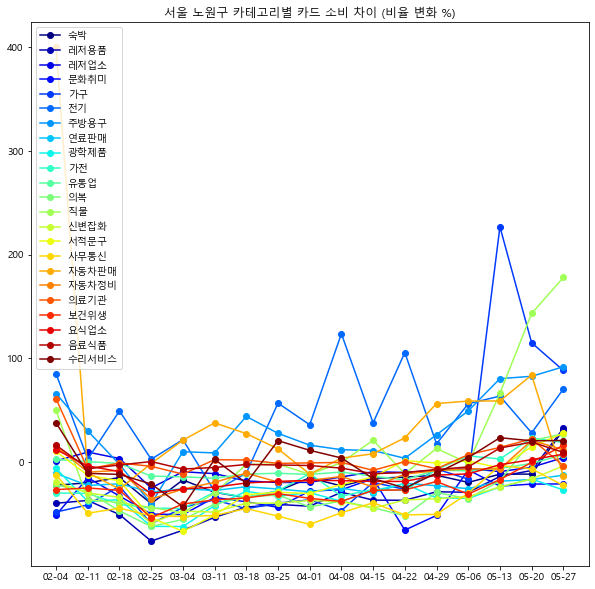

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'seoul_nowon.txt'
file_path = 'C:/Users/i/Desktop/'
s_nowon_df = pd.read_csv(file_path+file_name,sep=' ')
s_nowon_df.drop('GU_CD',axis=1,inplace=True)
s_nowon_df.columns = ['날짜','업종코드','수량']

s_nowon_piv = s_nowon_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
s_nowon_19 = s_nowon_piv.iloc[:120].copy()
s_nowon_20 = s_nowon_piv.iloc[120:].copy()
s_nowon_19_week = s_nowon_19.iloc[3::7].copy()
s_nowon_20_week = s_nowon_20.iloc[3::7].copy()

for i in range(len(s_nowon_19_week)):
    for j in range(len(s_nowon_19_week.columns)):
        key = s_nowon_19_week.columns[j]
        s_nowon_19_week[key].iloc[i]=s_nowon_19[key].iloc[i*7+3:i*7+10].copy().mean()
        s_nowon_20_week[key].iloc[i]=s_nowon_20[key].iloc[i*7+3:i*7+10].copy().mean()

s_nowon_19_week.index = map(lambda x : x[5:],s_nowon_19_week.index)
s_nowon_20_week.index = s_nowon_19_week.index


colors = plt.cm.jet(np.linspace(0,1,len(s_nowon_19_week.columns)))

s_nowon_diff = (s_nowon_20_week-s_nowon_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_nowon_diff.columns)):
    col= s_nowon_diff.columns[i]
    plt.plot(s_nowon_diff[col],marker='o',color=colors[i])
plt.title('서울 노원구 카테고리별 카드 소비 차이 (절대수량)')
plt.legend(names)
plt.savefig('신한카드_서울_노원구_증감_절대.png',dpi=300,edgecolor='black')


s_nowon_diff = (s_nowon_diff/s_nowon_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_nowon_diff.columns)):
    col= s_nowon_diff.columns[i]
    plt.plot(s_nowon_diff[col],marker='o',color=colors[i])
plt.title('서울 노원구 카테고리별 카드 소비 차이 (비율 변화 %)')
plt.legend(names)
plt.savefig('신한카드_서울_노원구_증감_상대.png',dpi=300,edgecolor='black')



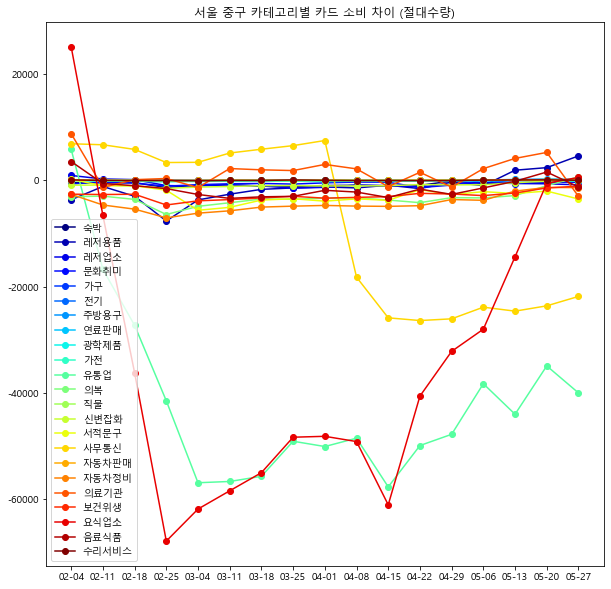

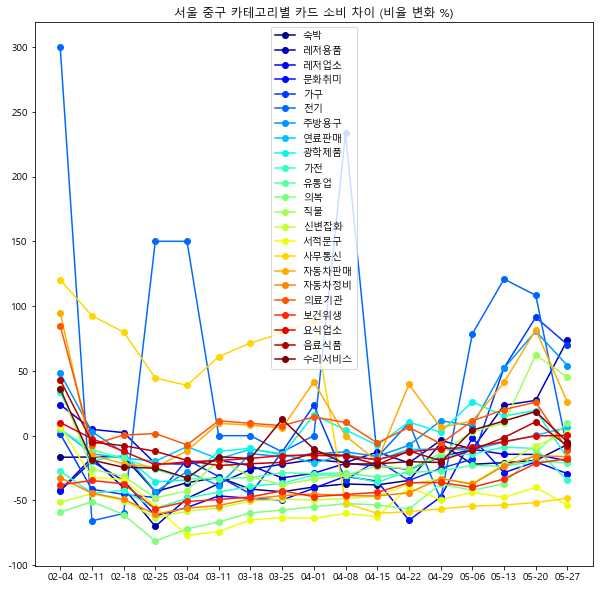

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'seoul_joongu.txt'
file_path = 'C:/Users/i/Desktop/'
s_joongu_df = pd.read_csv(file_path+file_name,sep=' ')
s_joongu_df.drop('GU_CD',axis=1,inplace=True)
s_joongu_df.columns = ['날짜','업종코드','수량']

s_joongu_piv = s_joongu_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
s_joongu_19 = s_joongu_piv.iloc[:120].copy()
s_joongu_20 = s_joongu_piv.iloc[120:].copy()
s_joongu_19_week = s_joongu_19.iloc[3::7].copy()
s_joongu_20_week = s_joongu_20.iloc[3::7].copy()

for i in range(len(s_joongu_19_week)):
    for j in range(len(s_joongu_19_week.columns)):
        key = s_joongu_19_week.columns[j]
        s_joongu_19_week[key].iloc[i]=s_joongu_19[key].iloc[i*7+3:i*7+10].copy().mean()
        s_joongu_20_week[key].iloc[i]=s_joongu_20[key].iloc[i*7+3:i*7+10].copy().mean()

s_joongu_19_week.index = map(lambda x : x[5:],s_joongu_19_week.index)
s_joongu_20_week.index = s_joongu_19_week.index


colors = plt.cm.jet(np.linspace(0,1,len(s_joongu_19_week.columns)))

s_joongu_diff = (s_joongu_20_week-s_joongu_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_joongu_diff.columns)):
    col= s_joongu_diff.columns[i]
    plt.plot(s_joongu_diff[col],marker='o',color=colors[i])
plt.title('서울 중구 카테고리별 카드 소비 차이 (절대수량)')
plt.legend(names)
plt.savefig('신한카드_서울_중구_증감_절대.png',dpi=300,edgecolor='black')


s_joongu_diff = (s_joongu_diff/s_joongu_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_joongu_diff.columns)):
    col= s_joongu_diff.columns[i]
    plt.plot(s_joongu_diff[col],marker='o',color=colors[i])
plt.title('서울 중구 카테고리별 카드 소비 차이 (비율 변화 %)')
plt.legend(names)
plt.savefig('신한카드_서울_중구_증감_상대.png',dpi=300,edgecolor='black')

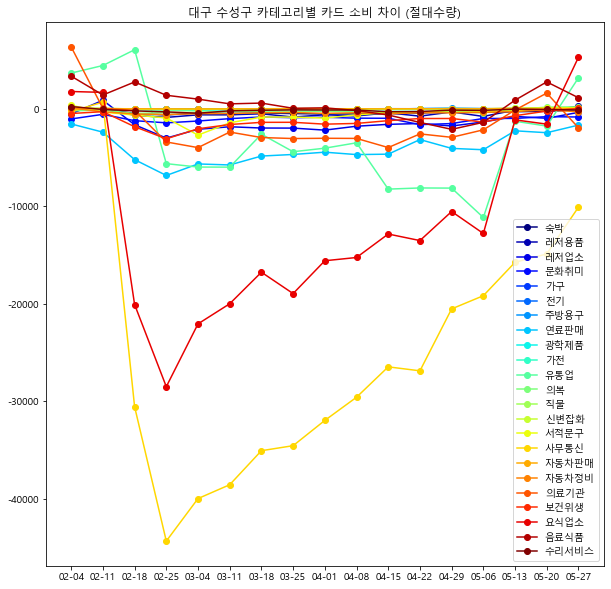

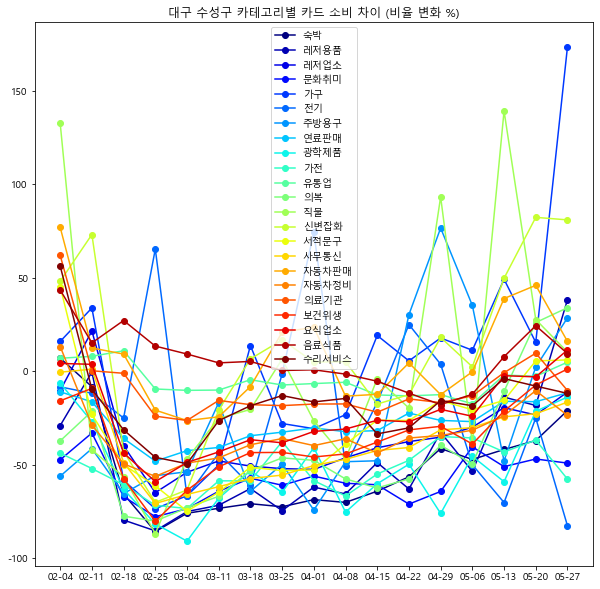

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'daegu_sooseong.txt'
file_path = 'C:/Users/i/Desktop/'
d_sooseong_df = pd.read_csv(file_path+file_name,sep=' ')
d_sooseong_df.drop('GU_CD',axis=1,inplace=True)
d_sooseong_df.columns = ['날짜','업종코드','수량']

d_sooseong_piv = d_sooseong_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
d_sooseong_19 = d_sooseong_piv.iloc[:120].copy()
d_sooseong_20 = d_sooseong_piv.iloc[120:].copy()
d_sooseong_19_week = d_sooseong_19.iloc[3::7].copy()
d_sooseong_20_week = d_sooseong_20.iloc[3::7].copy()

for i in range(len(d_sooseong_19_week)):
    for j in range(len(d_sooseong_19_week.columns)):
        key = d_sooseong_19_week.columns[j]
        d_sooseong_19_week[key].iloc[i]=d_sooseong_19[key].iloc[i*7+3:i*7+10].copy().mean()
        d_sooseong_20_week[key].iloc[i]=d_sooseong_20[key].iloc[i*7+3:i*7+10].copy().mean()

d_sooseong_19_week.index = map(lambda x : x[5:],d_sooseong_19_week.index)
d_sooseong_20_week.index = d_sooseong_19_week.index


colors = plt.cm.jet(np.linspace(0,1,len(d_sooseong_19_week.columns)))

d_sooseong_diff = (d_sooseong_20_week-d_sooseong_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_sooseong_diff.columns)):
    col= d_sooseong_diff.columns[i]
    plt.plot(d_sooseong_diff[col],marker='o',color=colors[i])
plt.title('대구 수성구 카테고리별 카드 소비 차이 (절대수량)')
plt.legend(names)
plt.savefig('신한카드_대구_수성구_증감_절대.png',dpi=300,edgecolor='black')


d_sooseong_diff = (d_sooseong_diff/d_sooseong_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_sooseong_diff.columns)):
    col= d_sooseong_diff.columns[i]
    plt.plot(d_sooseong_diff[col],marker='o',color=colors[i])
plt.title('대구 수성구 카테고리별 카드 소비 차이 (비율 변화 %)')
plt.legend(names)
plt.savefig('신한카드_대구_수성구_증감_상대.png',dpi=300,edgecolor='black')

In [61]:
d_sooseong_19_week.loc['02-25']

업종코드
10      739.571429
20     1036.714286
21     4631.428571
22     1854.142857
30       53.000000
31        7.857143
32       58.285714
33    14223.428571
34       85.714286
35      176.285714
40    59404.000000
42      498.428571
43       21.714286
44      118.571429
50     1539.142857
52    62673.714286
60       48.142857
62     1044.857143
70    14167.428571
71     3835.000000
80    48261.857143
81    10269.857143
92      693.142857
Name: 02-25, dtype: float64

In [63]:
d_sooseong_20_week.loc['02-25']-d_sooseong_19_week.loc['02-25']

업종코드
10     -634.571429
20     -885.285714
21    -3006.857143
22    -1442.571429
30      -39.000000
31        5.142857
32      -32.571429
33    -6837.857143
34      -70.000000
35     -126.428571
40    -5626.571429
42     -399.571429
43      -18.857143
44      -83.142857
50     -943.285714
52   -44329.428571
60      -10.000000
62     -587.571429
70    -3401.857143
71    -3079.714286
80   -28495.571429
81     1384.571429
92     -319.142857
Name: 02-25, dtype: float64

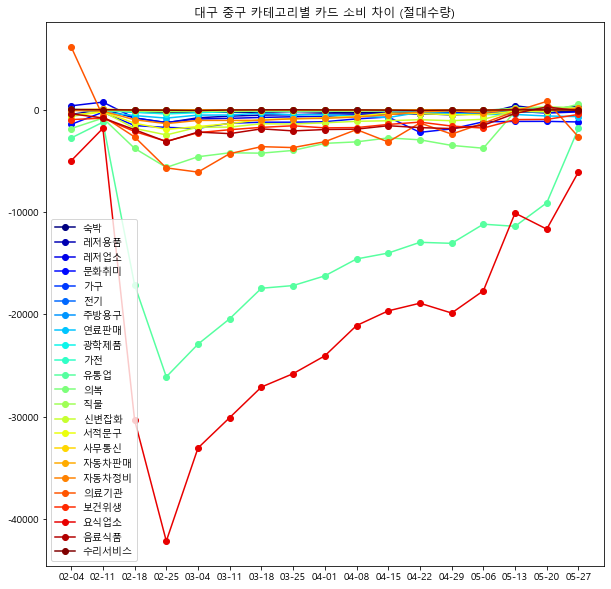

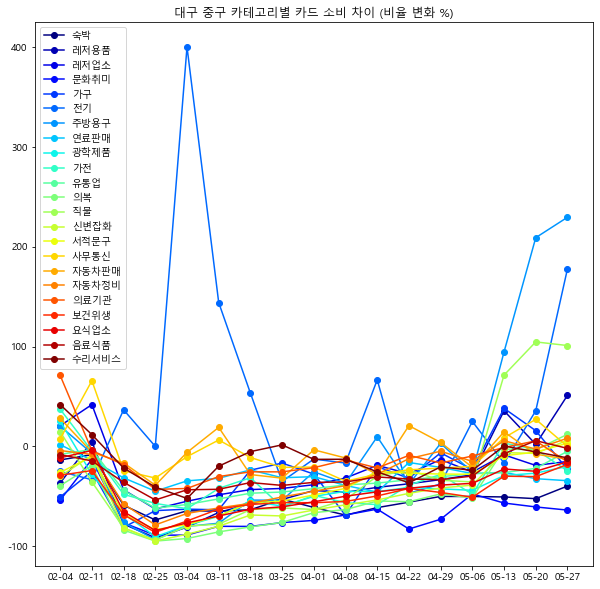

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'daegu_joongu.txt'
file_path = 'C:/Users/i/Desktop/'
d_joongu_df = pd.read_csv(file_path+file_name,sep=' ')
d_joongu_df.drop('GU_CD',axis=1,inplace=True)
d_joongu_df.columns = ['날짜','업종코드','수량']

d_joongu_piv = d_joongu_df.pivot_table('수량',columns='업종코드',index='날짜',fill_value=0)
d_joongu_19 = d_joongu_piv.iloc[:120].copy()
d_joongu_20 = d_joongu_piv.iloc[120:].copy()
d_joongu_19_week = d_joongu_19.iloc[3::7].copy()
d_joongu_20_week = d_joongu_20.iloc[3::7].copy()

for i in range(len(d_joongu_19_week)):
    for j in range(len(d_joongu_19_week.columns)):
        key = d_joongu_19_week.columns[j]
        d_joongu_19_week[key].iloc[i]=d_joongu_19[key].iloc[i*7+3:i*7+10].copy().mean()
        d_joongu_20_week[key].iloc[i]=d_joongu_20[key].iloc[i*7+3:i*7+10].copy().mean()

d_joongu_19_week.index = map(lambda x : x[5:],d_joongu_19_week.index)
d_joongu_20_week.index = d_joongu_19_week.index


colors = plt.cm.jet(np.linspace(0,1,len(d_joongu_19_week.columns)))

d_joongu_diff = (d_joongu_20_week-d_joongu_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_joongu_diff.columns)):
    col= d_joongu_diff.columns[i]
    plt.plot(d_joongu_diff[col],marker='o',color=colors[i])
plt.title('대구 중구 카테고리별 카드 소비 차이 (절대수량)')
plt.legend(names)
plt.savefig('신한카드_대구_중구_증감_절대.png',dpi=300,edgecolor='black')


d_joongu_diff = (d_joongu_diff/d_joongu_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_joongu_diff.columns)):
    col= d_joongu_diff.columns[i]
    plt.plot(d_joongu_diff[col],marker='o',color=colors[i])
plt.title('대구 중구 카테고리별 카드 소비 차이 (비율 변화 %)')
plt.legend(names)
plt.savefig('신한카드_대구_중구_증감_상대.png',dpi=300,edgecolor='black')